In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
plt.style.use('ggplot')

wine_file_path = '/Users/BryanGoldberg/Desktop/Personal Projects/winequality.csv'
wine = pd.read_csv(wine_file_path)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors = k)
	#Setting up a knn classifier with k neighbors
	knn.fit(X_train, y_train)
	#Fitting the model
	train_accuracy[i] = knn.score(X_train, y_train)
	#Computing accuracy on the training set
	test_accuracy[i] = knn.score(X_test, y_test)

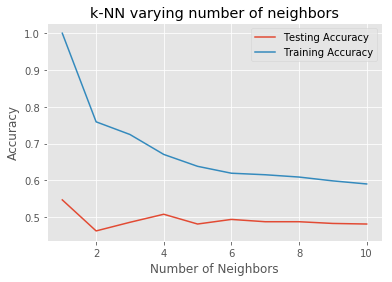

In [8]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
knn.score(X_test, y_test)

0.546875

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   1,   1,   0],
       [  2,   1,   9,   7,   0,   2],
       [  2,   8, 171,  77,  14,   1],
       [  1,   6,  77, 140,  28,   3],
       [  0,   2,  11,  30,  37,   0],
       [  0,   0,   1,   3,   2,   1]])

In [24]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,3,4,5,6,7,8,All
True,,,,,,,
3,0,0,2,1,1,0,4
4,2,1,9,7,0,2,21
5,2,8,171,77,14,1,273
6,1,6,77,140,28,3,255
7,0,2,11,30,37,0,80
8,0,0,1,3,2,1,7
All,5,17,271,258,82,7,640


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.06      0.05      0.05        21
          5       0.63      0.63      0.63       273
          6       0.54      0.55      0.55       255
          7       0.45      0.46      0.46        80
          8       0.14      0.14      0.14         7

avg / total       0.55      0.55      0.55       640



In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
knn_cv.best_params_

{'n_neighbors': 29}

In [30]:
knn_cv.best_score_

0.5078173858661663